# Transfer Value analysis (top 500)

In [3]:
from bs4 import BeautifulSoup
from requests_html import HTMLSession


import pandas as pd

## Web scrapping and Pagination from Transfermarkt


In [4]:
allplayers = []

for x in range (1,21):
    s= HTMLSession()
    url ="https://www.transfermarkt.fr/spieler-statistik/wertvollstespieler/marktwertetop?ajax=yw1&page="

    r = s.get(url+str(x)) # Web scrapping + Pagination
    soup = BeautifulSoup (r.content, 'html.parser')
    
    
    players1 = soup.find_all("tr", class_="odd")
    players2 = soup.find_all("tr", class_="even")
    p = players1 + players2 # Indentify scrapping section
   
    
    for player in p : # Loop to get necessary data
   
        ranking = player.find("td", class_="zentriert").text
        age = player.find_all("td", class_="zentriert")[1].text
        name = player.find("td", class_="hauptlink").text
        country = str(player.find("img", class_="flaggenrahmen").get_text)[-40:-3]
        club = str(player.find_all("td", class_="zentriert")[3].get_text)[-45:-12]
        position = player.find("table", class_="inline-table").text
        value = player.find("td", class_="rechts hauptlink").text.replace("\xa0","") 
        infoplayers = { "rank" : ranking, "age" : age, "name" : name, "value" : value, "country" : country, "club" : club}
        
        allplayers.append (infoplayers)

df = pd.DataFrame(allplayers)
df["rank"] = pd.to_numeric(df["rank"])
df.sort_values(by=['rank'], inplace = True) # Reorganise data by transfer value rank

df["value in million"] = df["value"].str.slice(-20,-10)
df["value in million"] = pd.to_numeric(df["value in million"])
df

df['nat'] = df['country'].str.split('e="').str[1] # Clean country column
df['nat'] = df['nat'].str.split('"').str[0] # Clean country column
df['clb'] = df['club'].str.split('e="').str[1] # Clean club column
df['clb'] = df['clb'].str.split('"').str[0] # Clean club column
df['dummycount'] = df["value in million"]/df["value in million"] 
df



,rank,age,name,value,country,club,value in million,nat,clb,dummycount
0,1,23,Kylian Mbappé,"160,00 mio. €","/50.png?lm=1520611569"" title=""France""","2728"" title=""Paris Saint-Germain""",160,France,Paris Saint-Germain,1.0
13,2,21,Erling Haaland,"150,00 mio. €","25.png?lm=1520611569"" title=""Norvège""","67356331"" title=""Manchester City""",150,Norvège,Manchester City,1.0
1,3,22,Vinicius Junior,"100,00 mio. €","/26.png?lm=1520611569"" title=""Brésil""","m=1580722449"" title=""Real Madrid""",100,Brésil,Real Madrid,1.0
14,4,22,Phil Foden,"90,00 mio. €","png?lm=1520611569"" title=""Angleterre""","67356331"" title=""Manchester City""",90,Angleterre,Manchester City,1.0
2,5,30,Mohamed Salah,"90,00 mio. €","l/2.png?lm=1520611569"" title=""Égypte""","=1456567819"" title=""FC Liverpool""",90,Égypte,FC Liverpool,1.0
...,...,...,...,...,...,...,...,...,...,...
485,496,27,Mattia Zaccagni,"18,00 mio. €","/75.png?lm=1520611569"" title=""Italie""","lm=1601537785"" title=""Lazio Rome""",18,Italie,Lazio Rome,1.0
498,497,28,Benjamin Bourigeaud,"18,00 mio. €","/50.png?lm=1520611569"" title=""France""","8779098"" title=""Stade Rennais FC""",18,France,Stade Rennais FC,1.0
486,498,25,Dean Henderson,"18,00 mio. €","png?lm=1520611569"" title=""Angleterre""","890289"" title=""Nottingham Forest""",18,Angleterre,Nottingham Forest,1.0
499,499,25,Joe Gomez,"18,00 mio. €","png?lm=1520611569"" title=""Angleterre""","=1456567819"" title=""FC Liverpool""",18,Angleterre,FC Liverpool,1.0


In [254]:

df.isna().sum() # Check NA

rank                0
age                 0
name                0
value               0
country             0
club                0
value in million    0
nat                 0
clb                 0
dtype: int64

In [261]:
df.sort_values(by=['nat']).head(50) # Check NA
df.sort_values(by=['nat']).tail(50) # Check NA
df.sort_values(by=['clb']).head(50) # Check NA
df.sort_values(by=['clb']).tail(50) # Check NA

,rank,age,name,value,country,club,value in million,nat,clb
23,22,30,Heung-min Son,"75,00 mio. €","g?lm=1520611569"" title=""Corée du Sud""","345801"" title=""Tottenham Hotspur""",75,Corée du Sud,Tottenham Hotspur
83,92,25,Richarlison,"48,00 mio. €","/26.png?lm=1520611569"" title=""Brésil""","345801"" title=""Tottenham Hotspur""",48,Brésil,Tottenham Hotspur
15,6,28,Harry Kane,"90,00 mio. €","png?lm=1520611569"" title=""Angleterre""","345801"" title=""Tottenham Hotspur""",90,Angleterre,Tottenham Hotspur
439,429,29,Ben Davies,"20,00 mio. €","lm=1520611569"" title=""Pays de Galles""","345801"" title=""Tottenham Hotspur""",20,Pays de Galles,Tottenham Hotspur
435,446,29,Lucas Moura,"20,00 mio. €","/26.png?lm=1520611569"" title=""Brésil""","345801"" title=""Tottenham Hotspur""",20,Brésil,Tottenham Hotspur
96,93,24,Cristian Romero,"48,00 mio. €",".png?lm=1520611569"" title=""Argentine""","345801"" title=""Tottenham Hotspur""",48,Argentine,Tottenham Hotspur
121,118,22,Dejan Kulusevski,"40,00 mio. €","/147.png?lm=1520611569"" title=""Suède""","345801"" title=""Tottenham Hotspur""",40,Suède,Tottenham Hotspur
280,286,25,Sergio Reguilón,"25,00 mio. €","57.png?lm=1520611569"" title=""Espagne""","345801"" title=""Tottenham Hotspur""",25,Espagne,Tottenham Hotspur
255,261,23,Emerson Royal,"25,00 mio. €","/26.png?lm=1520611569"" title=""Brésil""","345801"" title=""Tottenham Hotspur""",25,Brésil,Tottenham Hotspur
469,464,21,Bryan Gil,"18,00 mio. €","57.png?lm=1520611569"" title=""Espagne""","345801"" title=""Tottenham Hotspur""",18,Espagne,Tottenham Hotspur


## Create tables for analysis : Player Value by country

In [5]:
VbyN = df.groupby ("nat").sum().sort_values(by=["value in million"], ascending = False)

In [33]:
df.to_excel("foot.xlsx")  # Export to Excel for Power BI Vizu
df

,rank,age,name,value,country,club,value in million,nat,clb,dummycount
0,1,23,Kylian Mbappé,"160,00 mio. €","/50.png?lm=1520611569"" title=""France""","2728"" title=""Paris Saint-Germain""",160,France,Paris Saint-Germain,1.0
13,2,21,Erling Haaland,"150,00 mio. €","25.png?lm=1520611569"" title=""Norvège""","67356331"" title=""Manchester City""",150,Norvège,Manchester City,1.0
1,3,22,Vinicius Junior,"100,00 mio. €","/26.png?lm=1520611569"" title=""Brésil""","m=1580722449"" title=""Real Madrid""",100,Brésil,Real Madrid,1.0
14,4,22,Phil Foden,"90,00 mio. €","png?lm=1520611569"" title=""Angleterre""","67356331"" title=""Manchester City""",90,Angleterre,Manchester City,1.0
2,5,30,Mohamed Salah,"90,00 mio. €","l/2.png?lm=1520611569"" title=""Égypte""","=1456567819"" title=""FC Liverpool""",90,Égypte,FC Liverpool,1.0
...,...,...,...,...,...,...,...,...,...,...
485,496,27,Mattia Zaccagni,"18,00 mio. €","/75.png?lm=1520611569"" title=""Italie""","lm=1601537785"" title=""Lazio Rome""",18,Italie,Lazio Rome,1.0
498,497,28,Benjamin Bourigeaud,"18,00 mio. €","/50.png?lm=1520611569"" title=""France""","8779098"" title=""Stade Rennais FC""",18,France,Stade Rennais FC,1.0
486,498,25,Dean Henderson,"18,00 mio. €","png?lm=1520611569"" title=""Angleterre""","890289"" title=""Nottingham Forest""",18,Angleterre,Nottingham Forest,1.0
499,499,25,Joe Gomez,"18,00 mio. €","png?lm=1520611569"" title=""Angleterre""","=1456567819"" title=""FC Liverpool""",18,Angleterre,FC Liverpool,1.0


In [35]:
VbyN

VbyN["%"] = VbyN["value in million"] / VbyN["value in million"].sum() * 100
VbyN["Acc %"] = VbyN["%"].cumsum()
VbyN["Avg Value per player in million"] = VbyN["value in million"] / VbyN["dummycount"]
VbyN
VbyN1 = VbyN.sort_values(by=["value in million"], ascending = False).head(10)
VbyN2 = VbyN.sort_values(by=["dummycount"], ascending = False).head(10)
VbyN3 = VbyN.sort_values(by=["Avg Value per player in million"], ascending = False).head(10)


## Create chart for basic insights : Top 10 countries by Player Value, Top 10 countries by number of players and Top 10 countries by Average Player Value

<AxesSubplot:xlabel='nat'>

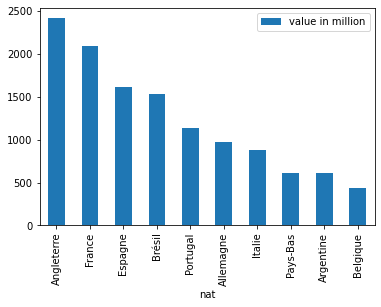

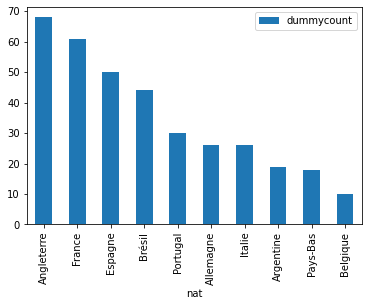

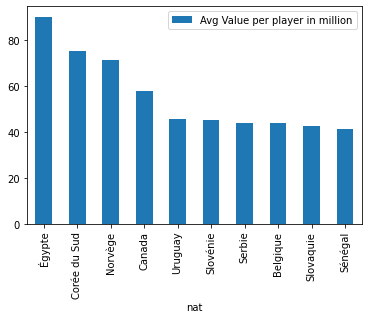

In [29]:
VbyN1.plot(kind='bar',y = "value in million")
VbyN2.plot(kind='bar',y = "dummycount")
VbyN3.plot(kind='bar', y = "Avg Value per player in million")

###  Interesting remarks : Top 10 countries by player value are almost the same as Top 10 by number of player (the only difference is switched place between NL and Arg).  The Top 10 are all countries that have a strong football cultrure and foundation (Big fandom, high quality national championship, solid youth development, etc.) so it is easy to understand that why they all have a lot of high valuable players. 


### However, the 3rd bar chart shows us that only Belgium remains in the Top 10 by Average Player Value. The other 9 countries are those who have a medium football system (potential dark horse in World Cup but hardly candidat for the Cup). In fact, when we look at the table, it is indicated that these countries dont have a lot players in Top 500 but when they have one, he is a very high valuable player (Salah, Son, Halaand, Davies, etc.).

In [31]:
VbyN3

,rank,value in million,dummycount,%,Acc %,Avg Value per player in million
nat,,,,,,
Égypte,5,90,1.0,0.529755,95.532403,90.0
Corée du Sud,22,75,1.0,0.441462,96.474189,75.0
Norvège,586,213,3.0,1.253752,80.781682,71.0
Canada,122,115,2.0,0.676909,92.595209,57.5
Uruguay,890,273,6.0,1.606922,74.065572,45.5
Slovénie,107,45,1.0,0.264877,97.321796,45.0
Serbie,1195,219,5.0,1.289069,79.527930,43.8
Belgique,1811,436,10.0,2.566366,72.458650,43.6
Slovaquie,475,85,2.0,0.500324,96.032727,42.5


## Create table of analysis : Player value by Club Top 10 

In [8]:
VbyCLB = df.groupby ("clb").sum().sort_values(by=["value in million"], ascending = False)
VbyCLB.head(20)

,rank,value in million,dummycount
clb,,,
Manchester City,2073,996,17.0
FC Bayern München,1786,777,15.0
FC Liverpool,2552,765,16.0
Real Madrid,1606,730,14.0
Paris Saint-Germain,2299,717,14.0
Chelsea FC,3049,684,17.0
Tottenham Hotspur,4697,656,19.0
FC Barcelone,2639,631,15.0
Atlético de Madrid,3540,607,17.0


### For football fans, it is not difficult to see that the top 20 clubs by player value are from the top 10 countries by player value. It is too soon to conclude but we can say that a high quality national championship can result in a high quality football national team